In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scanpy as sc

In [3]:
# Read metrics from each model using PreLect features
# lr_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/LR_likelihood/LR_metrics_l2_k3_stratifiedKF.csv', index_col=0)
# svm_rbf_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l2.csv', index_col=0)
# svm_linear_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/SVM_model/linear/SVM_metrics_linear_StandardScale_l2.csv', index_col=0)
# xgb_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/XGB_model/XGBclassifier_binary_metrics_l2.csv', index_col=0)

lr_metrics_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/LR_likelihood/LR_metrics_l2_k3_stratifiedKF.csv', index_col=0)
svm_rbf_metrics_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l2.csv', index_col=0)
xgb_metrics_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/XGB_model/XGBclassifier_binary_metrics_l2.csv', index_col=0)

In [4]:
# Read metrics from each model using DEG
# lr_deg_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/DEG_L2/LR_DEG_metrics_l2.csv', index_col=0)
# svm_rbf_deg_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/DEG_L2/SVM_metrics_rbf_StandardScale_l2_DEG.csv', index_col=0)
# xgb_deg_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/DEG_L2/XGBclassifier_DEG_binary_metrics_l2.csv', index_col=0)

lr_deg_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/DEG_L2/LR_DEG_metrics_l2.csv', index_col=0)
svm_rbf_deg_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/DEG_L2/SVM_metrics_rbf_StandardScale_l2_DEG.csv', index_col=0)
xgb_deg_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/DEG_L2/XGBclassifier_DEG_binary_metrics_l2.csv', index_col=0)

In [5]:
def plot_bar_metric_from_diff_models(metrics_list, metric_to_plot='Accuracy', legend=True):
    models = ['Logistic Regression', 'SVM-RBF', 'XGBoost']
    metric_df = pd.DataFrame()
    for i, df in enumerate(metrics_list):
        metric = df[metric_to_plot]  # accuracy, precision and so on
        metric_df[models[i]] = metric
    metric_df = metric_df.drop('Doublet')
    
    plt.figure(figsize=(15, 4))
    x = np.arange(len(metric_df))
    width = 0.1
    for i in range(0, len(metric_df), 2):
        plt.axvspan(i-0.5, i+0.5, color='gray', alpha=0.1)
    for i, model in enumerate(models):
        i -= 1.5
        plt.bar(x + i * width, metric_df[model], label=model, width=width)
    
    # ax = metric_df.plot.bar(rot=90, figsize=(15, 4), title='Accuracy of different models')
    # ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Plot horizontal line at y = 0
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
    # Formatting
    plt.xticks(x, metric_df.index, rotation=90)
    plt.title(f'Compare PreLect features with DEG ({metric_to_plot})')
    plt.ylabel(f'Difference in {metric_to_plot}')
    # plt.ylim(0, 1.05)
    plt.xlim(-0.5, len(metric_df) - 0.5)
    if legend:
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

In [6]:
PreLect_DEG_diff_list = [lr_metrics_l2 - lr_deg_l2, 
                         svm_rbf_metrics_l2 - svm_rbf_deg_l2, 
                         xgb_metrics_l2 - xgb_deg_l2]


In [7]:
PreLect_DEG_diff_list[0].head()

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.000008,0.006277,0.017949,0.010157,0.000015,0.010892,0.011140
B_intermediate,0.002032,0.047170,0.105913,0.080206,0.001842,0.075261,0.079347
B_memory,0.001638,0.039551,0.041485,0.040505,0.000735,0.024641,0.041348
B_naive,0.001360,0.013809,0.014740,0.014278,0.000436,0.012982,0.014990
CD14_Mono,0.000865,0.002203,0.001025,0.001621,0.000113,0.000427,0.002205


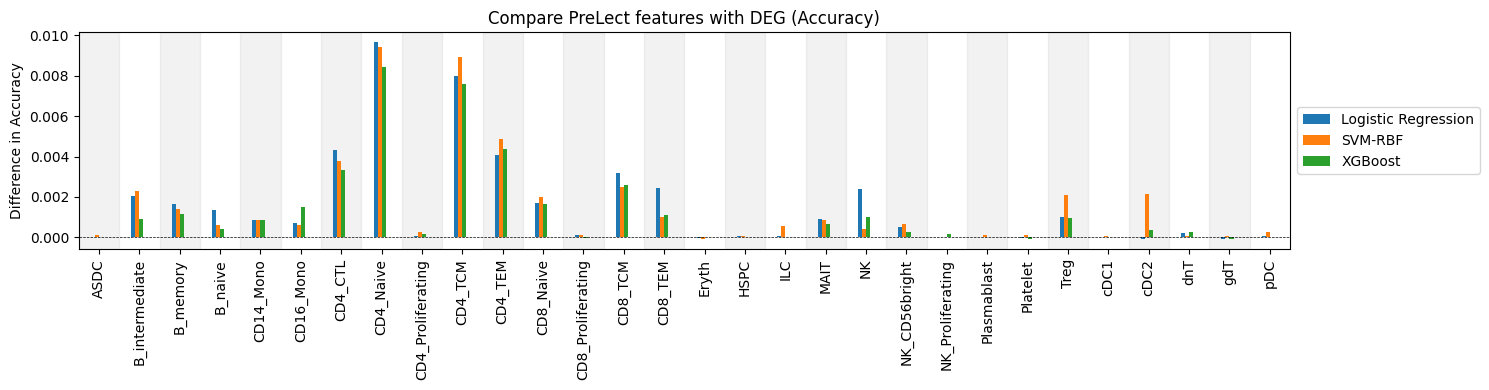

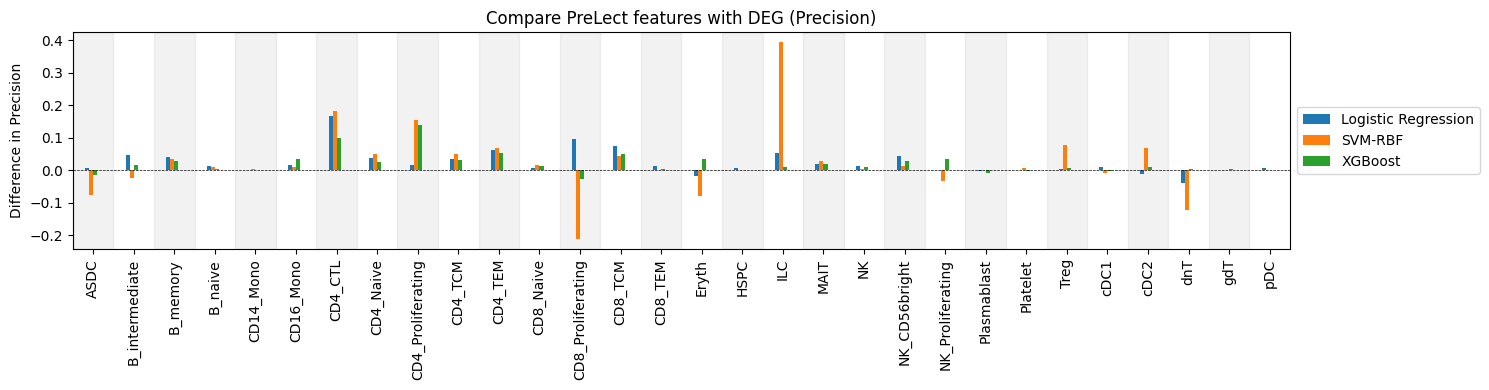

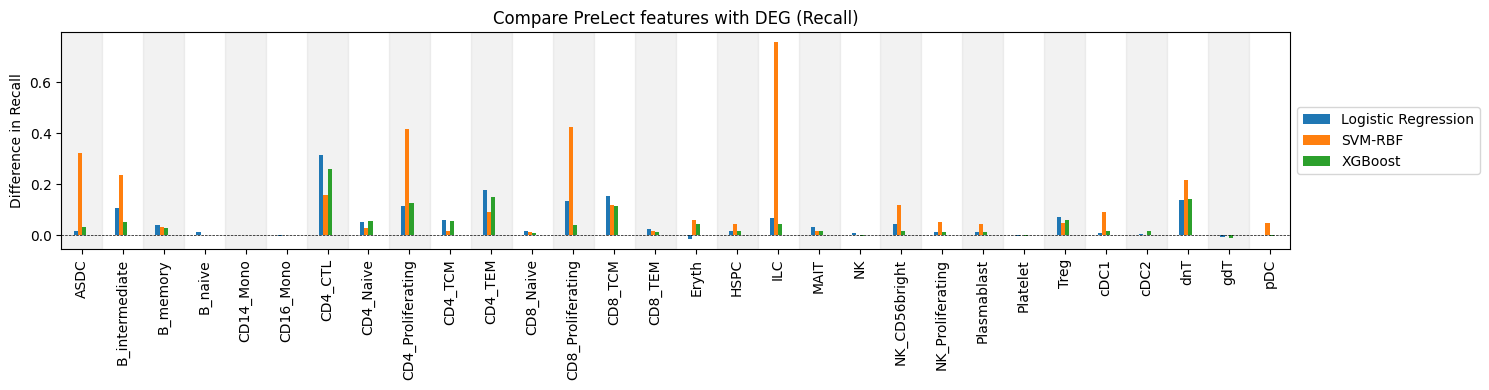

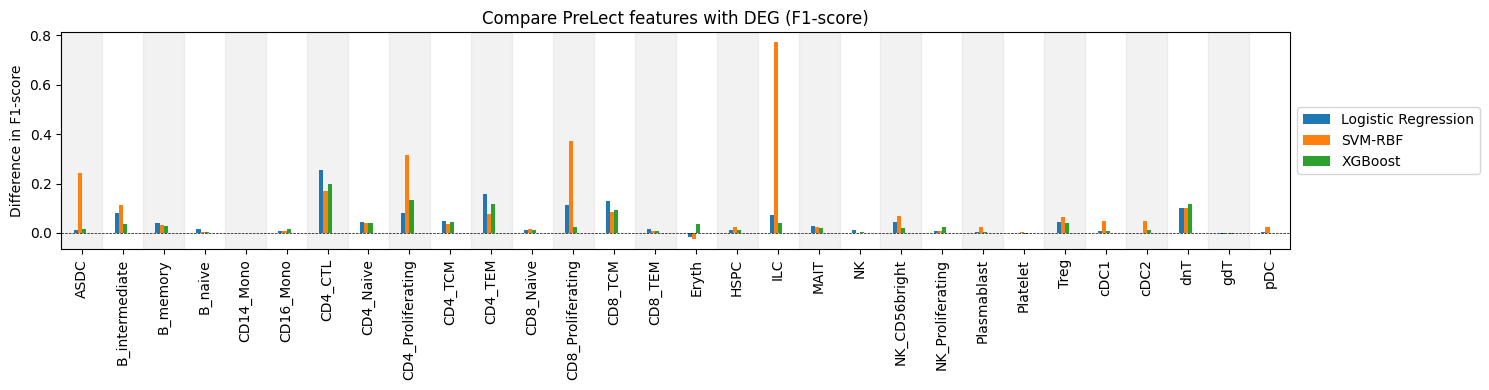

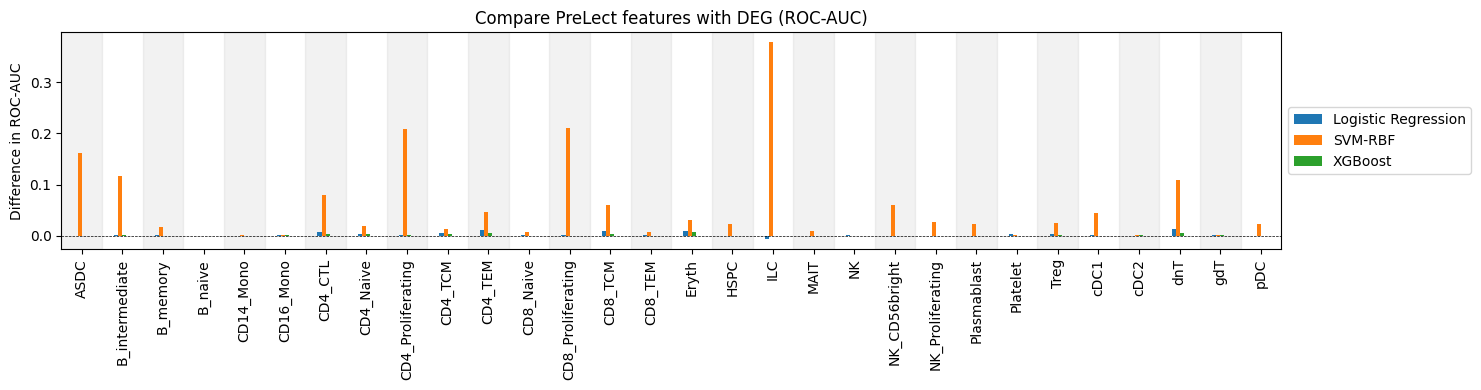

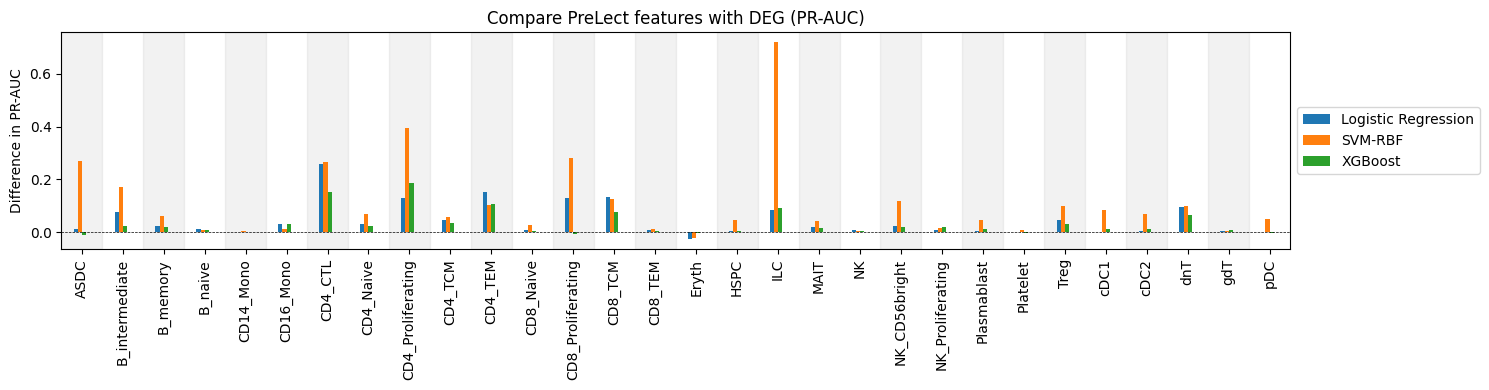

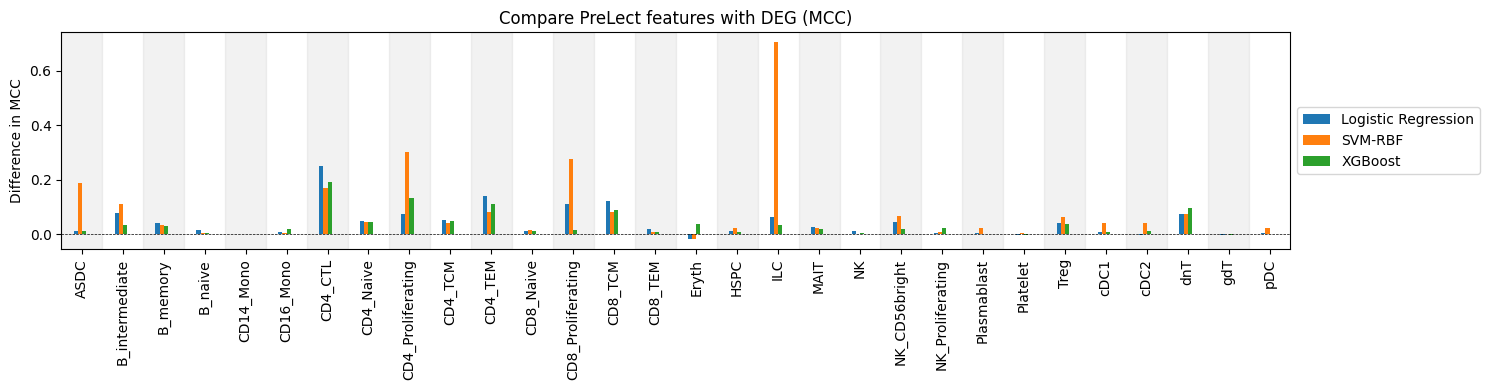

In [8]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
for m in metric_names:
    plot_bar_metric_from_diff_models(PreLect_DEG_diff_list, metric_to_plot=m)